**What the data is about**
* Discrete sample data are derived from manual field collection and laboratory analyses and include water quality, sediment, biological, air and soil samples from thousands of monitoring locations across the United States and related territories.

**Filters Used**
* We used the website waterdata.usgs.gov
* Under the filter section for location we chose New Jersey because after investigating the map provided by usgs, we found that new Jersey had a lot tracking for PCB.
* Under characteristic we chose **organiscs, PCB**
* Under data profiles - we chose **full physical chemical**
* We will start investigating the data to see understand what questions we need to ask

In [ ]:
# Data Science cleaning Stack Used and for Vizualiation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,OneHotEncoder
#imputation is to fill in mising data
from sklearn.impute import SimpleImputer

# import seaborn
import seaborn as sns
#https://seaborn.pydata.org/tutorial/color_palettes.html

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [ ]:
# Investigating the data to find missing data
# Let fpc represent full physical chemical of PCB
fpc = pd.read_csv("/content/fullphyschem.csv")
# get the
fpc.head(8)

,Org_Identifier,Org_FormalName,Project_Identifier,Project_Name,Project_QAPPApproved,Project_QAPPApprovalAgency,ProjectAttachment_FileName,ProjectAttachment_FileType,Location_Identifier,Location_Name,...,ResultAttachment_FileName,ResultAttachment_FileType,ResultAttachment_FileDownload,ProviderName,Result_CharacteristicComparable,Result_CharacteristicGroup,Org_Type,LastChangeDate,USGSpcode,USGSSampleAquifer
0,USGS,U.S. Geological Survey,"[""USGS""]",NaN,NaN,NaN,NaN,NaN,USGS-394710075210701,150592-- 22 (Rp 2/12) Obs,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39492,NaN
1,USGS,U.S. Geological Survey,"[""NAWQA - National Water-Quality Assessment"",""...",NaN,NaN,NaN,NaN,NaN,USGS-01463500,Delaware River at Trenton NJ,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39488,NaN
2,USGS,U.S. Geological Survey,"[""USGS"",""443405900""]",NaN,NaN,NaN,NaN,NaN,USGS-405635074333901,270278-- 176-Sh,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39516,NaN
3,USGS,U.S. Geological Survey,"[""NAWQA - National Water-Quality Assessment"",""...",NaN,NaN,NaN,NaN,NaN,USGS-01463500,Delaware River at Trenton NJ,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,81648,NaN
4,USGS,U.S. Geological Survey,"[""USGS""]",NaN,NaN,NaN,NaN,NaN,USGS-400158074515900,Mill Ck at Willingboro Parkway at Willingboro NJ,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39516,NaN
5,USGS,U.S. Geological Survey,"[""USGS"",""13300""]",NaN,NaN,NaN,NaN,NaN,USGS-403118074274302,231184-- Obs 2,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39496,NaN
6,USGS,U.S. Geological Survey,"[""USGS""]",NaN,NaN,NaN,NaN,NaN,USGS-01410784,Great Egg Harbor R near Sicklerville NJ,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39516,NaN
7,USGS,U.S. Geological Survey,"[""USGS"",""443400305""]",NaN,NaN,NaN,NaN,NaN,USGS-402200074304801,230311-- Dom,...,NaN,NaN,NaN,USGS,NaN,"Organics, PCBs",Federal/US Government,2025-04-21,39516,NaN


In [ ]:
# printing the attributes to identify the column names
print(fpc.shape)
print('----------------------------------------')
# Get information about the data set we are investigating
print(fpc.info())
print('****************************************')
# finding which categories have missing data
print(fpc.isnull().sum())
print('----------------------------------------')

(1207, 181)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Columns: 181 entries, Org_Identifier to USGSSampleAquifer
dtypes: float64(123), int64(2), object(56)
memory usage: 1.7+ MB
None
****************************************
Org_Identifier                   0
Org_FormalName                   0
Project_Identifier               0
Project_Name                  1207
Project_QAPPApproved          1207
                              ... 
Result_CharacteristicGroup       0
Org_Type                         0
LastChangeDate                   0
USGSpcode                        0
USGSSampleAquifer             1207
Length: 181, dtype: int64
----------------------------------------


In [ ]:
# Drop all the columns with no information those appear as zero
fpc_drop = fpc.dropna(axis =1, how = "all")
fpc_drop.head(5)

,Org_Identifier,Org_FormalName,Project_Identifier,Location_Identifier,Location_Name,Location_Type,Location_State,Location_CountryName,Location_CountyName,Location_CountryCode,...,ResultAnalyticalMethod_Name,ResultAnalyticalMethod_Description,LabInfo_Name,LabInfo_AnalysisStartDate,LabInfo_LaboratoryComment,ProviderName,Result_CharacteristicGroup,Org_Type,LastChangeDate,USGSpcode
0,USGS,U.S. Geological Survey,"[""USGS""]",USGS-394710075210701,150592-- 22 (Rp 2/12) Obs,Well,New Jersey,United States of America,Gloucester County,US,...,NaN,NaN,NaN,NaN,NaN,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39492
1,USGS,U.S. Geological Survey,"[""NAWQA - National Water-Quality Assessment"",""...",USGS-01463500,Delaware River at Trenton NJ,Stream,New Jersey,United States of America,Mercer County,US,...,"Organochlorines &Aroclors,GC/ECD","DESCRIPTION: GC/ECD: Pesticides, Insecticides,...",NaN,2002-08-01,NaN,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39488
2,USGS,U.S. Geological Survey,"[""USGS"",""443405900""]",USGS-405635074333901,270278-- 176-Sh,Well,New Jersey,United States of America,Morris County,US,...,"Pest, organochlorine,PCBs,GC-ECD","DESCRIPTION: Pesticides, organochlorine and to...",NaN,NaN,NaN,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39516
3,USGS,U.S. Geological Survey,"[""NAWQA - National Water-Quality Assessment"",""...",USGS-01463500,Delaware River at Trenton NJ,Stream,New Jersey,United States of America,Mercer County,US,...,"Organochlorines &Aroclors,GC/ECD","DESCRIPTION: GC/ECD: Pesticides, Insecticides,...",NaN,2005-06-13,[d - sample was diluted],USGS,"Organics, PCBs",Federal/US Government,2025-04-21,81648
4,USGS,U.S. Geological Survey,"[""USGS""]",USGS-400158074515900,Mill Ck at Willingboro Parkway at Willingboro NJ,Stream,New Jersey,United States of America,Burlington County,US,...,NaN,NaN,NaN,NaN,NaN,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39516


In [ ]:
# check the attributes again for the 68 column
fpc.drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 68 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Org_Identifier                            1207 non-null   object 
 1   Org_FormalName                            1207 non-null   object 
 2   Project_Identifier                        1207 non-null   object 
 3   Location_Identifier                       1207 non-null   object 
 4   Location_Name                             1207 non-null   object 
 5   Location_Type                             1207 non-null   object 
 6   Location_State                            1207 non-null   object 
 7   Location_CountryName                      1207 non-null   object 
 8   Location_CountyName                       1207 non-null   object 
 9   Location_CountryCode                      1207 non-null   object 
 10  Location_StatePostalCode            

In [ ]:
# Drop any thing that has data of less than 1000 because they are off no use to us
# We are doing this because we want to work with a dataa set that has all the information provided
fpc2 = fpc_drop.drop([ "Org_Identifier","Activity_ConductingOrganization","Activity_Comment","Activity_DepthHeightMeasure","Activity_DepthHeightMeasureUnit",
          "SampleCollectionMethod_Identifier","SampleCollectionMethod_IdentifierContext", "SampleCollectionMethod_Name", "SampleCollectionMethod_Description",
          "SampleCollectionMethod_EquipmentName","Result_ResultDetectionCondition","Result_Measure", "Result_MeasureUnit", "DataQuality_ResultComment",
          "DetectionLimit_TypeA", "DetectionLimit_MeasureA", "DetectionLimit_MeasureUnitA", "DetectionLimit_CommentA", "DetectionLimit_TypeB","DetectionLimit_MeasureB",
          "DetectionLimit_MeasureUnitB", "DetectionLimit_CommentB", "ResultAnalyticalMethod_Identifier", "ResultAnalyticalMethod_IdentifierContext", "ResultAnalyticalMethod_Name",
          "ResultAnalyticalMethod_Description", "LabInfo_Name", "LabInfo_AnalysisStartDate", "LabInfo_LaboratoryComment"],axis =1)
# Check to see if those columns were drop
print(fpc2.head(8))
print('+++++++++++++++++++++++++++++++++++++++++++++++++')
# check to see where there is missing data in the remaining column
print(fpc2.isnull().sum())

           Org_FormalName                                 Project_Identifier  \
0  U.S. Geological Survey                                           ["USGS"]   
1  U.S. Geological Survey  ["NAWQA - National Water-Quality Assessment","...   
2  U.S. Geological Survey                               ["USGS","443405900"]   
3  U.S. Geological Survey  ["NAWQA - National Water-Quality Assessment","...   
4  U.S. Geological Survey                                           ["USGS"]   
5  U.S. Geological Survey                                   ["USGS","13300"]   
6  U.S. Geological Survey                                           ["USGS"]   
7  U.S. Geological Survey                               ["USGS","443400305"]   

    Location_Identifier                                     Location_Name  \
0  USGS-394710075210701                         150592-- 22 (Rp 2/12) Obs   
1         USGS-01463500                      Delaware River at Trenton NJ   
2  USGS-405635074333901                         

In [ ]:
# My checked there is no duplication in the Data
# check the first 8 rows to see what columns we have
fpc2.head(8)

,Org_FormalName,Project_Identifier,Location_Identifier,Location_Name,Location_Type,Location_State,Location_CountryName,Location_CountyName,Location_CountryCode,Location_StatePostalCode,...,Result_CASNumber,Result_SampleFraction,Result_MeasureIdentifier,Result_MeasureStatusIdentifier,Result_MeasureType,ProviderName,Result_CharacteristicGroup,Org_Type,LastChangeDate,USGSpcode
0,U.S. Geological Survey,"[""USGS""]",USGS-394710075210701,150592-- 22 (Rp 2/12) Obs,Well,New Jersey,United States of America,Gloucester County,US,NJ,...,11141-16-5,Unfiltered,5239a682-3522-4790-a78b-a65ce1000021,Historical,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39492
1,U.S. Geological Survey,"[""NAWQA - National Water-Quality Assessment"",""...",USGS-01463500,Delaware River at Trenton NJ,Stream,New Jersey,United States of America,Mercer County,US,NJ,...,11104-28-2,Unfiltered,2489dc22-e230-4f7a-b247-c307e77d4c30,Accepted,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39488
2,U.S. Geological Survey,"[""USGS"",""443405900""]",USGS-405635074333901,270278-- 176-Sh,Well,New Jersey,United States of America,Morris County,US,NJ,...,1336-36-3,Unfiltered,f16347f3-a5b2-4392-a808-826cda5fcd11,Historical,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39516
3,U.S. Geological Survey,"[""NAWQA - National Water-Quality Assessment"",""...",USGS-01463500,Delaware River at Trenton NJ,Stream,New Jersey,United States of America,Mercer County,US,NJ,...,NaN,Unfiltered,3f0c3a15-34e0-4ef0-9fcc-21575350b7f1,Accepted,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,81648
4,U.S. Geological Survey,"[""USGS""]",USGS-400158074515900,Mill Ck at Willingboro Parkway at Willingboro NJ,Stream,New Jersey,United States of America,Burlington County,US,NJ,...,1336-36-3,Unfiltered,94b2dd7f-9ece-456a-8bbf-46cdd1a869b2,Historical,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39516
5,U.S. Geological Survey,"[""USGS"",""13300""]",USGS-403118074274302,231184-- Obs 2,Well,New Jersey,United States of America,Middlesex County,US,NJ,...,53469-21-9,Unfiltered,93ccf71f-2064-4e32-af3c-c9457c1b56b4,Historical,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39496
6,U.S. Geological Survey,"[""USGS""]",USGS-01410784,Great Egg Harbor R near Sicklerville NJ,Stream,New Jersey,United States of America,Camden County,US,NJ,...,1336-36-3,Unfiltered,9c61006e-f6ef-43c0-b43e-5ed431cbfaeb,Historical,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39516
7,U.S. Geological Survey,"[""USGS"",""443400305""]",USGS-402200074304801,230311-- Dom,Well,New Jersey,United States of America,Middlesex County,US,NJ,...,1336-36-3,Unfiltered,2dfd6975-01f8-4364-a363-d42ef82450dc,Historical,Actual,USGS,"Organics, PCBs",Federal/US Government,2025-04-21,39516


In [ ]:
# Use the groupby function from the Pandas package to categorize the locations where the water samples are collected
fpc2_Date = print(fpc2.groupby(["Activity_StartDate"]).count())
print('-----------------------------------------------------------')
fpc2_LoType = print(fpc2.groupby(["Location_Type"]).count())
print('-----------------------------------------------------------')
# group by activity and location type
fpc2_AandL = print(fpc2.groupby(["Activity_StartDate","Location_Type"]).count())

                    Org_FormalName  Project_Identifier  Location_Identifier  \
Activity_StartDate                                                            
1971-10-29                       1                   1                    1   
1972-06-12                       1                   1                    1   
1972-06-13                       7                   7                    7   
1972-06-14                       1                   1                    1   
1972-06-15                       2                   2                    2   
...                            ...                 ...                  ...   
2010-08-23                       1                   1                    1   
2011-08-22                       1                   1                    1   
2014-08-25                       1                   1                    1   
2017-06-08                       1                   1                    1   
2017-06-14                       1                  

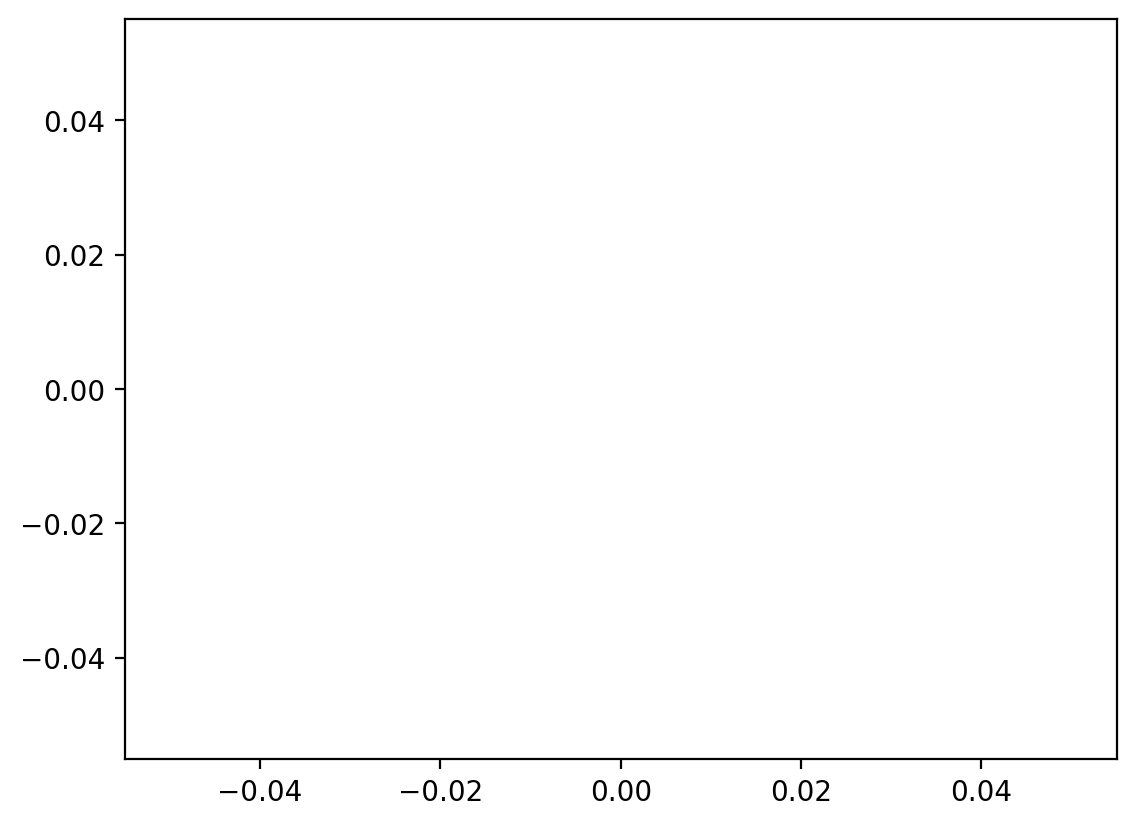

In [ ]:
# To determine how data collection of PCBs have changed over the years, we can make a scatter plot
# to graph the location_type vs the location_startdate
plt.scatter(fpc2_Date, fpc2_LoType)
# group by activity and location type
